In [3]:
import numpy as np
import phoebe
import matplotlib.pyplot as plt

In [4]:
params = {'period@binary': 1.67,
't0_supconj': 1.23,
'mass@primary': 1.2,
'mass@secondary': 0.93,
'requiv@primary': 1.5,
'requiv@secondary': 0.93,
'teff@primary': 6000,
'teff@secondary': 5610,
'incl@binary': 89.751,
'ecc': 0.,
'per0': 86,
# 'pblum': 15.024,
'vgamma': 25,
# 'l3': 0.0
         }

In [3]:
lc = np.loadtxt('data/synthetic/lc.data')
rv1 = np.loadtxt('data/synthetic/rv1.data')
rv2 = np.loadtxt('data/synthetic/rv2.data')

In [5]:
b = phoebe.default_binary()
b.flip_constraint('mass@secondary', solve_for='q')
b.flip_constraint('mass@primary', solve_for='sma@binary')

# b.add_dataset('lc', times=lc[:,0], fluxes=lc[:,1], sigmas=lc[:,2], passband='Johnson:V')
# b.add_dataset('rv')
# b.set_value('times', component='primary', dataset='rv01', value=rv1[:,0])
# b.set_value('times', component='secondary', dataset='rv01', value=rv2[:,0])
# b.set_value('rvs', component='primary', dataset='rv01', value=rv1[:,1])
# b.set_value('rvs', component='secondary', dataset='rv01', value=rv2[:,1])
# b.set_value('sigmas', component='primary', dataset='rv01', value=rv1[:,2])
# b.set_value('sigmas', component='secondary', dataset='rv01', value=rv2[:,2])

for twig in params.keys():
    b[twig] = params[twig]
b.run_delayed_constraints()
b.run_checks()

<RunChecksReport 0 items: status=PASS>

In [5]:
b.run_compute()

100%|██████████| 200/200 [00:06<00:00, 28.85it/s]


<ParameterSet: 7 parameters | kinds: rv, lc>

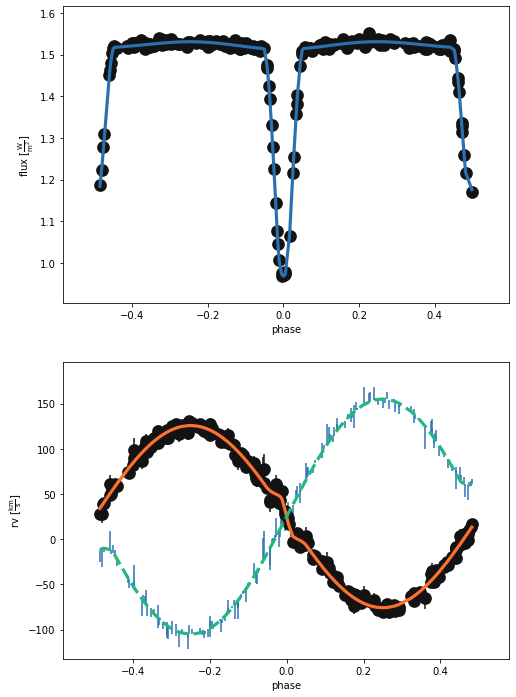

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [6]:
%matplotlib inline
b.plot(x='phase', show=True)

In [6]:
b.save('data/synthetic/true.bundle')

'data/synthetic/true.bundle'